<a href="https://colab.research.google.com/github/HusnaRiyaz/ML-based-Toxicity-Prediction-of-drug-compounds/blob/main/Tox_PaDEL(MACCSfp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 1.5 MB/s 


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-11-27 07:43:33--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-11-27 07:43:34--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-11-27 07:43:34 (97.0 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("Training.smi", 
                  sep='\t', 
                  names=["Smiles", "ID", "Activity"])
df

,Smiles,ID,Activity
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,DB00006,0
1,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,DB00007,0
2,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,DB00014,0
3,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,DB00027,0
4,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,DB00035,0
...,...,...,...
12692,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263,1
12693,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292,1
12694,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314,1
12695,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1


In [ ]:
df.tail(2)

,Smiles,ID,Activity
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1
6715,C1=CN=NN=NN=C1,ZINC98359352,1


Text(0, 0.5, 'Compounds')

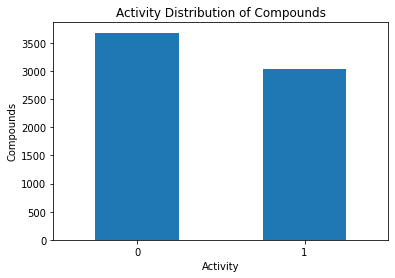

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(df['Activity'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Activity Distribution of Compounds")

plt.xticks(range(2))

plt.xlabel("Activity")

plt.ylabel("Compounds")

In [ ]:
df2 = pd.concat( [df['Smiles'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Smiles,ID
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,DB00006
1,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,DB00007
2,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,DB00014
3,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,DB00027
4,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,DB00035
...,...,...
12692,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263
12693,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292
12694,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314
12695,CCN(CCC(=C)C(=O)O)CC,ZINC98359322


In [ ]:
from padelpy import padeldescriptor

fingerprint = 'MACCS'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                retain3d=True,
                retainorder=True,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,...,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,D00013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0
1,D00006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
2,D00015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0
3,D00014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,0
4,D00016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,ZINC98359257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0
6712,ZINC98359292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0
6713,ZINC98359322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0
6714,ZINC98359352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
X = descriptors.drop('Name', axis=1)
y = df['Activity']

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6711    1
6712    1
6713    1
6714    1
6715    1
Name: Activity, Length: 6716, dtype: int64

In [ ]:
print(X,y)

      MACCSFP1  MACCSFP2  MACCSFP3  ...  MACCSFP164  MACCSFP165  MACCSFP166
0            0         0         0  ...           1           0           0
1            0         0         0  ...           1           1           0
2            0         0         0  ...           1           0           0
3            0         0         0  ...           1           0           0
4            0         0         0  ...           1           0           0
...        ...       ...       ...  ...         ...         ...         ...
6711         0         0         0  ...           1           1           0
6712         0         0         0  ...           1           1           0
6713         0         0         0  ...           1           0           0
6714         0         0         0  ...           1           1           0
6715         0         0         0  ...           0           1           0

[6716 rows x 166 columns] 0       0
1       0
2       0
3       0
4       0
       ..
6

In [ ]:
print(X.shape, y.shape)

(6716, 166) (6716,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,MACCSFP16,MACCSFP38,MACCSFP50,MACCSFP53,MACCSFP54,MACCSFP57,MACCSFP62,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP69,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,...,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,...,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1
6712,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1
6713,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0
6714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
#SMOTE (Synthetic Minority Oversampling Technique) 
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

# **Under-sampling**

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
help(NearMiss)

In [ ]:
# Implementing Undersampling for Handling Imbalanced
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((6070, 104), (6070,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3681, 1: 3035})
Resampled dataset shape Counter({0: 3035, 1: 3035})


# **Over Sampling**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((6914, 104), (6914,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3681, 1: 3035})
Resampled dataset shape Counter({0: 3457, 1: 3457})


# **Data Split(80/20)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_test, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5372, 104), (1344, 104))

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

model = RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19, n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19,
                       n_estimators=500, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.795
Test Accuracy - : 0.700


In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.5881141739589497

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.38723884313961693

# **Cross Validation(5CV)**

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.68, 0.67, 0.64, 0.66, 0.66])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6617605127538868

# **MCC score:(10CV)**

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
cv_scores

array([0.7 , 0.62, 0.68, 0.65, 0.61, 0.66, 0.66, 0.65, 0.65, 0.67])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6552477276345938

In [ ]:
model_name = pd.Series(['Random forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,Random forest,0.595174,0.653024,0.419647


In [ ]:
# Import needed packages
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       747
           1       0.72      0.58      0.65       597

    accuracy                           0.72      1344
   macro avg       0.72      0.70      0.70      1344
weighted avg       0.72      0.72      0.71      1344



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[614, 133],
       [249, 348]])

# **SVM Linear**

0.7142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion_Matrix
[[590 157]
 [227 370]]


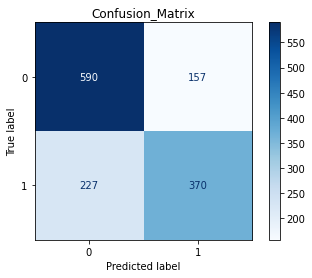

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       747
           1       0.70      0.62      0.66       597

    accuracy                           0.71      1344
   macro avg       0.71      0.70      0.71      1344
weighted avg       0.71      0.71      0.71      1344



In [ ]:
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

0.41685213346258704

# **5Fold_CV**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
cv_scores

array([0.7 , 0.7 , 0.69, 0.7 , 0.72])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.701973929236499

In [ ]:
model_name = pd.Series(['SVM'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM,0.595174,0.706812,0.419511


# **CV - 10**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)
cv_scores

array([0.69, 0.73, 0.69, 0.72, 0.71, 0.67, 0.7 , 0.69, 0.73, 0.72])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.7064394647393962

In [ ]:
model_name = pd.Series(['SVM'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM,0.598905,0.705137,0.384378


# **SVM - RBF with changes in C value**

0.6979166666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion_Matrix
[[630 117]
 [289 308]]


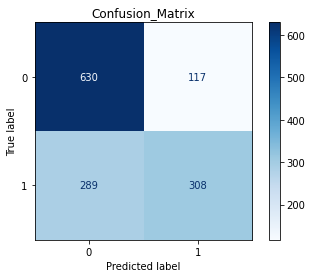

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       747
           1       0.72      0.52      0.60       597

    accuracy                           0.70      1344
   macro avg       0.71      0.68      0.68      1344
weighted avg       0.70      0.70      0.69      1344



In [ ]:
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

0.3839158249965389

# **CV - 5**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='rbf', C=0.1, ).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
cv_scores

array([0.71, 0.7 , 0.69, 0.7 , 0.72])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.7042068338313628

In [ ]:
model_name = pd.Series(['SVM(RBF)'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM(RBF),0.598905,0.70439,0.391899


# **CV - 10**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='rbf', C=0.01, ).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)
cv_scores

array([0.68, 0.71, 0.67, 0.7 , 0.7 , 0.64, 0.67, 0.67, 0.69, 0.67])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6813046458017487

In [ ]:
model_name = pd.Series(['SVM(RBF)'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM(RBF),0.598905,0.704205,0.391899


0.7202380952380952


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion_Matrix
[[567 180]
 [196 401]]


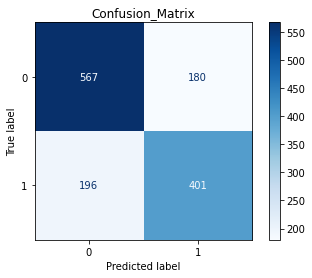

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='poly', C=0.1).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       747
           1       0.69      0.67      0.68       597

    accuracy                           0.72      1344
   macro avg       0.72      0.72      0.72      1344
weighted avg       0.72      0.72      0.72      1344



In [ ]:
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

0.43201633888892244

# **CV - 5**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='poly', C=0.1, ).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
cv_scores

array([0.71, 0.7 , 0.69, 0.7 , 0.73])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.7038356069464293

In [ ]:
model_name = pd.Series(['SVM(RBF)'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM(RBF),0.598905,0.709234,0.445392


# **CV - 10**

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='poly', C=0.1, ).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)
cv_scores

array([0.68, 0.73, 0.67, 0.73, 0.7 , 0.69, 0.69, 0.7 , 0.73, 0.73])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.7045796902798834

In [ ]:
model_name = pd.Series(['SVM(RBF)'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM(RBF),0.598905,0.707371,0.391899
